In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings("ignore")
sns.set()
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support


In [86]:
w=pd.read_excel("Win_Prediction_Data.xlsx")

In [87]:
w

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost
...,...,...,...,...,...,...,...,...,...
10056,Power ind,Solution 9,2019-03-18,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
10057,Internal,Solution 6,2019-03-04,Sector 20,Others,Rudraksh Sharma,Sharavan Singh,777058.82,Won
10058,Power ind,Solution 9,2019-02-28,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost
10059,Power ind,Solution 62,2019-01-27,Sector 9,L5,Man Suddeth,Cleotilde Biron,3042058.82,Won


In [88]:
w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10061 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   9982 non-null   object        
 1   Solution Type     10061 non-null  object        
 2   Deal Date         10061 non-null  datetime64[ns]
 3   Sector            10061 non-null  object        
 4   Location          10061 non-null  object        
 5   VP Name           10061 non-null  object        
 6   Manager Name      10061 non-null  object        
 7   Deal Cost         10061 non-null  float64       
 8   Deal Status Code  10061 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 707.5+ KB


In [89]:
# Checking for the duplicate in the data set
w.duplicated().sum()

14

In [90]:
w[w.duplicated()]

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
3036,Domestic Public Bank,Solution 32,2015-03-20,Sector 2,L7,Rosanna Maynez,Earline Langton,735294.12,Lost
3385,Tech,Solution 32,2015-07-31,Sector 2,L10,Long Bergstrom,Emil Knudsen,235294.12,Lost
3880,Telecom,Solution 12,2013-08-30,Sector 24,Others,Mangesh K. Singh,Sohil Kumar,588235.29,Lost
5037,Tech,Solution 13,2012-05-08,Sector 23,L5,Sargar Deep Rao,Karan Dubey,0.00,Lost
7637,Govt,Solution 34,2018-02-21,Sector 4,L10,Mervin Harwood,Akshay Sharma,602941.18,Lost
7705,Internal,Solution 9,2015-01-06,Sector 20,Others,Sargar Deep Rao,Brenton Launius,2120294.12,Lost
7718,Services_based,Solution 26,2018-02-11,Sector 17,L10,Molly Eakes,vansu dev,264705.88,Lost
8020,Internal,Solution 9,2015-07-02,Sector 2,L9,Sargar Deep Rao,Rahul Kocher,264705.88,Lost
8167,Infrastructure,Solution 9,2015-05-18,Sector 24,L10,Mervin Harwood,nahar singh,352941.18,Lost
8177,Services_based,Solution 9,2015-10-03,Sector 23,L1,Ankita Aggarwal,bhagwati prasad,147058.82,Lost


In [91]:
# drop duplicate rows and columns
w.drop_duplicates(inplace=True)

In [92]:
# checking for duplicate droped or not
w.duplicated().sum()

0

In [93]:
# checking for null values
w.isna().sum()

Client Category     79
Solution Type        0
Deal Date            0
Sector               0
Location             0
VP Name              0
Manager Name         0
Deal Cost            0
Deal Status Code     0
dtype: int64

In [94]:
w["Client Category"].value_counts(dropna=False)

Others                   1762
Internal                 1451
Services_based           1200
Tech                      911
Domestic Public Bank      418
International Bank        375
Consulting                352
Finance                   339
Telecom                   326
Power ind                 264
Domestic Private Bank     261
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            151
Domestic Bank             134
Retail_market             126
Govt                      120
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
NaN                        79
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce

In [95]:
w[w["Client Category"].isnull()]

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
488,NaN,Solution 7,2018-10-05,Sector 12,L10,Ankita Aggarwal,Kizzie Troxel,441176.47,Lost
491,NaN,Solution 7,2019-01-06,Sector 12,L10,Ankita Aggarwal,Kizzie Troxel,441176.47,Lost
518,NaN,Solution 10,2012-01-12,Sector 19,L10,Mangesh K. Singh,Hardeep Suksma,38235.29,Won
732,NaN,Solution 10,2013-11-08,Sector 23,L10,Rosanna Maynez,Sohil Kumar,58823.53,Won
1128,NaN,Solution 37,2013-09-27,Sector 24,L10,Mervin Harwood,Marcelo Riles,311764.71,Lost
...,...,...,...,...,...,...,...,...,...
9477,NaN,Solution 32,2018-09-26,Sector 23,L10,Long Bergstrom,Md Irshad,588235.29,Lost
9753,NaN,Solution 9,2018-08-04,Sector 19,L10,Gopa Trilochana,Darla Dickinson,485294.12,Won
9819,NaN,Solution 9,2018-09-15,Sector 19,L10,Clinton Mani,Sanchita Gulati,720588.24,Won
9904,NaN,Solution 14,2018-11-29,Sector 12,L10,Mangesh K. Singh,keshar ansari,529411.77,Won


In [96]:
# filling Null values
w["Client Category"].fillna("Others", inplace = True)

In [97]:
# checking for the treatment of null values
w["Client Category"].value_counts(dropna=False)

Others                   1841
Internal                 1451
Services_based           1200
Tech                      911
Domestic Public Bank      418
International Bank        375
Consulting                352
Finance                   339
Telecom                   326
Power ind                 264
Domestic Private Bank     261
Insurance                 247
Consumer Good             185
Automobiles               178
Infrastructure            151
Domestic Bank             134
Retail_market             126
Govt                      120
Hospitality               119
Manufacturing             117
Pharma                    110
Healthcare                 99
Electronics                81
Media_Journal              71
Industries                 66
Research Development       63
Energy                     57
Knowledge                  50
Management                 43
Govt Bank Special          41
Payment                    40
Energy                     37
e-commerce                 32
Airpline  

In [98]:
w.columns

Index(['Client Category', 'Solution Type', 'Deal Date', 'Sector', 'Location',
       'VP Name', 'Manager Name', 'Deal Cost', 'Deal Status Code'],
      dtype='object')

<AxesSubplot:>

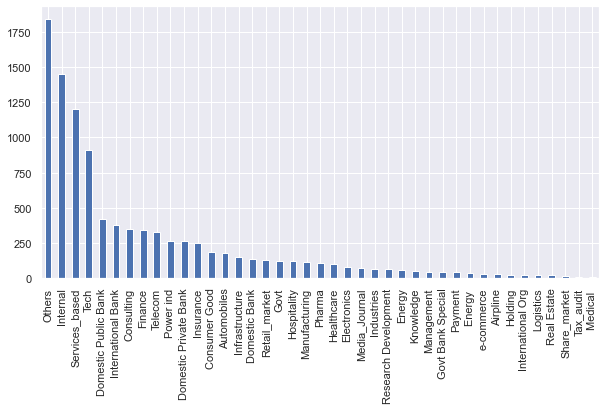

In [99]:
w['Client Category'].value_counts().plot.bar(figsize=(10,5))

<AxesSubplot:>

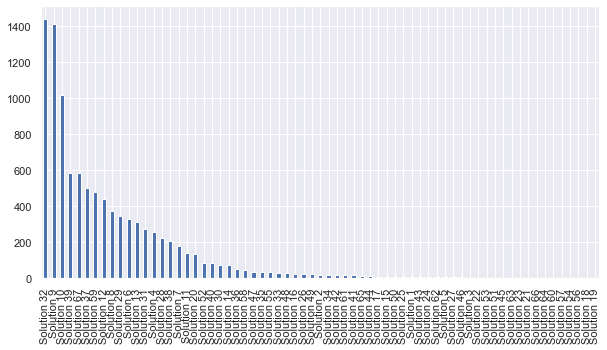

In [100]:
w['Solution Type'].value_counts().plot.bar(figsize=(10,5))

<AxesSubplot:>

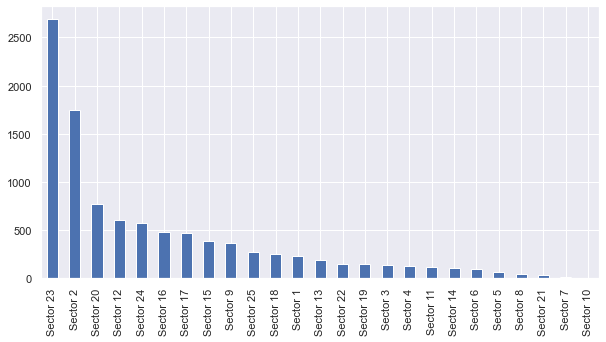

In [101]:
w['Sector'].value_counts().plot.bar(figsize=(10,5))

<AxesSubplot:>

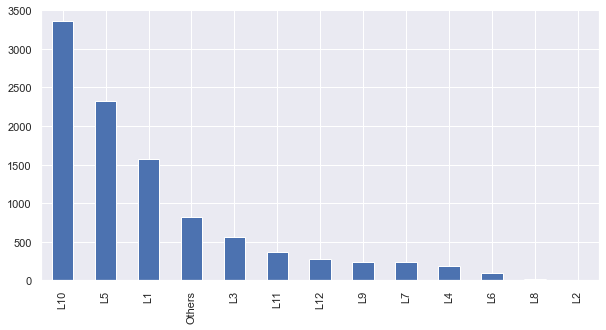

In [102]:
w['Location'].value_counts().plot.bar(figsize=(10,5))

<AxesSubplot:>

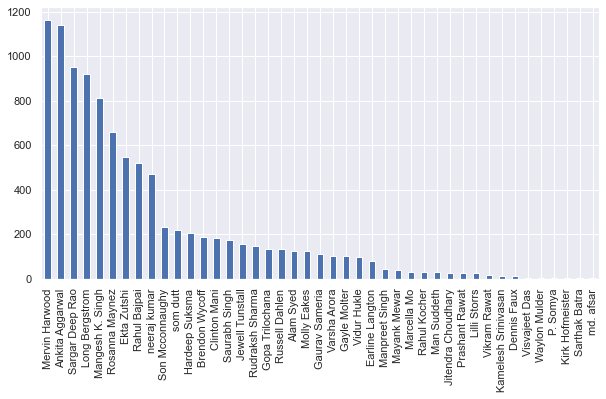

In [103]:
w['VP Name'].value_counts().plot.bar(figsize=(10,5))

<AxesSubplot:>

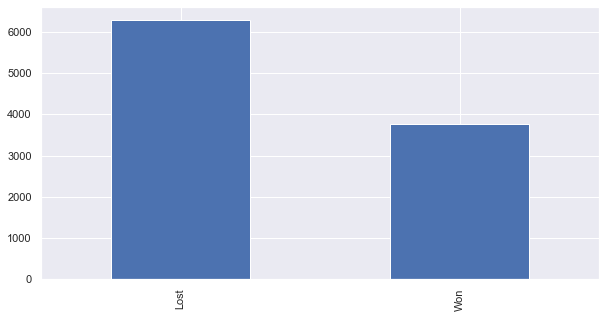

In [104]:
w['Deal Status Code'].value_counts().plot.bar(figsize=(10,5))

### Deal cost treatment

In [105]:
w.loc[ (w["Deal Cost"]==0.0)]

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code
79,Govt,Solution 37,2011-11-20,Sector 12,L5,Ekta Zutshi,shafibul,0.0,Lost
95,Others,Solution 31,2011-11-07,Sector 16,L5,Rosanna Maynez,Ankita Aggarwal,0.0,Lost
139,Govt,Solution 37,2012-02-06,Sector 12,L5,Ekta Zutshi,shafibul,0.0,Lost
150,Others,Solution 31,2012-03-23,Sector 16,L5,Rosanna Maynez,Ankita Aggarwal,0.0,Lost
210,Domestic Public Bank,Solution 59,2012-06-12,Sector 2,L10,Mervin Harwood,Lino Batterton,0.0,Lost
...,...,...,...,...,...,...,...,...,...
7886,Retail_market,Solution 9,2014-11-24,Sector 23,L10,Mangesh K. Singh,Fredricka Bald,0.0,Lost
7903,Tech,Solution 9,2015-05-31,Sector 2,L10,Rosanna Maynez,Fredricka Bald,0.0,Lost
7907,Tech,Solution 9,2014-12-21,Sector 2,L10,Rosanna Maynez,Fredricka Bald,0.0,Lost
7921,Retail_market,Solution 9,2014-12-21,Sector 23,L10,Mangesh K. Singh,Fredricka Bald,0.0,Lost


In [106]:
# looking for median Value
w["Deal Cost"].median()

382352.94

In [107]:
#Adding median value in dataset
w["Deal Cost"]=np.where((w["Deal Cost"]==0.0), 382352.94, w["Deal Cost"])

In [108]:
# checking ofr replacement 
w.loc[ (w["Deal Cost"]==0.0)]

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code


## Outliers treatment 

In [109]:
w.describe(percentiles=[0.01,0.02, .03,0.04, 0.05, 0.1, .2, .25, .5,.75,.9, .95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,...,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Deal Cost,10047.0,776620.150438,1.617537e+06,294.12,1470.59,14705.88,38458.8212,57941.18,65352.941,110294.12,...,205882.35,382352.94,764705.88,1470588.24,2558823.53,2882352.94,3258529.41,4.442176e+06,6.829506e+06,36764705.88


In [110]:
w["Deal Cost"]=np.where(w["Deal Cost"]>6.829506e+06, 6.829506e+06, w["Deal Cost"])

<AxesSubplot:xlabel='Deal Cost', ylabel='Density'>

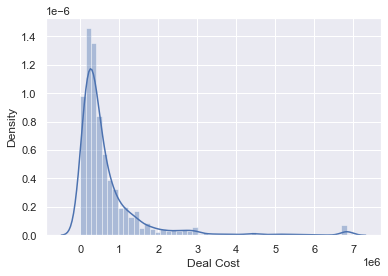

In [111]:
sns.distplot(w["Deal Cost"])

## Treatment of categorical variable

In [112]:
from sklearn.preprocessing import LabelEncoder

In [113]:
le=LabelEncoder()

In [114]:
w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10047 entries, 0 to 10060
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   10047 non-null  object        
 1   Solution Type     10047 non-null  object        
 2   Deal Date         10047 non-null  datetime64[ns]
 3   Sector            10047 non-null  object        
 4   Location          10047 non-null  object        
 5   VP Name           10047 non-null  object        
 6   Manager Name      10047 non-null  object        
 7   Deal Cost         10047 non-null  float64       
 8   Deal Status Code  10047 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 784.9+ KB


In [115]:
w["Client_Category"]=le.fit_transform(w["Client Category"])
w["Solution_Type"]=le.fit_transform(w["Solution Type"])
w["Locations"]=le.fit_transform(w["Location"])
w["VP_Name"]=le.fit_transform(w["VP Name"])
w["Manager_Name"]=le.fit_transform(w["Manager Name"])
w["Deal_Status_Code"]=le.fit_transform(w["Deal Status Code"])

In [116]:
w

,Client Category,Solution Type,Deal Date,Sector,Location,VP Name,Manager Name,Deal Cost,Deal Status Code,Client_Category,Solution_Type,Locations,VP_Name,Manager_Name,Deal_Status_Code
0,Telecom,Solution 7,2012-03-27,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,150000.00,Won,39,64,7,6,82,1
1,Telecom,Solution 7,2012-09-25,Sector 24,L5,Ekta Zutshi,Gopa Trilochana,744705.88,Won,39,64,7,6,82,1
2,Internal,Solution 59,2011-08-01,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,19,54,12,6,183,0
3,Internal,Solution 59,2011-04-28,Sector 20,Others,Ekta Zutshi,Russell Dahlen,60000.00,Lost,19,54,12,6,183,0
4,Internal,Solution 32,2011-06-03,Sector 20,Others,Ekta Zutshi,Russell Dahlen,80882.35,Lost,19,25,12,6,183,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10056,Power ind,Solution 9,2019-03-18,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost,31,66,7,29,182,0
10057,Internal,Solution 6,2019-03-04,Sector 20,Others,Rudraksh Sharma,Sharavan Singh,777058.82,Won,19,55,12,29,198,1
10058,Power ind,Solution 9,2019-02-28,Sector 9,L5,Rudraksh Sharma,Rudraksh Sharma,588235.29,Lost,31,66,7,29,182,0
10059,Power ind,Solution 62,2019-01-27,Sector 9,L5,Man Suddeth,Cleotilde Biron,3042058.82,Won,31,58,7,19,50,1


In [117]:
w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10047 entries, 0 to 10060
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Client Category   10047 non-null  object        
 1   Solution Type     10047 non-null  object        
 2   Deal Date         10047 non-null  datetime64[ns]
 3   Sector            10047 non-null  object        
 4   Location          10047 non-null  object        
 5   VP Name           10047 non-null  object        
 6   Manager Name      10047 non-null  object        
 7   Deal Cost         10047 non-null  float64       
 8   Deal Status Code  10047 non-null  object        
 9   Client_Category   10047 non-null  int32         
 10  Solution_Type     10047 non-null  int32         
 11  Locations         10047 non-null  int32         
 12  VP_Name           10047 non-null  int32         
 13  Manager_Name      10047 non-null  int32         
 14  Deal_Status_Code  1004

In [118]:
w.drop("Client Category",axis="columns",inplace=True)
w.drop("Solution Type",axis="columns",inplace=True)
w.drop("Sector",axis="columns",inplace=True)
w.drop("Location",axis="columns",inplace=True)
w.drop("VP Name",axis="columns",inplace=True)
w.drop("Manager Name",axis="columns",inplace=True)
w.drop("Deal Date",axis="columns",inplace=True)
w.drop("Deal Status Code",axis="columns",inplace=True)

In [119]:
w

,Deal Cost,Client_Category,Solution_Type,Locations,VP_Name,Manager_Name,Deal_Status_Code
0,150000.00,39,64,7,6,82,1
1,744705.88,39,64,7,6,82,1
2,60000.00,19,54,12,6,183,0
3,60000.00,19,54,12,6,183,0
4,80882.35,19,25,12,6,183,0
...,...,...,...,...,...,...,...
10056,588235.29,31,66,7,29,182,0
10057,777058.82,19,55,12,29,198,1
10058,588235.29,31,66,7,29,182,0
10059,3042058.82,31,58,7,19,50,1


In [120]:
X=w.drop(columns=["Deal_Status_Code"])
y=w["Deal_Status_Code"]

In [121]:
from sklearn.model_selection import train_test_split

In [122]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

## Decision tree

In [123]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf1=RandomForestClassifier(n_estimators=200, max_depth=7)
rf1.fit(X_train, y_train)
print("Train Accuracy :", rf1.score(X_train,y_train))
print("Test Accuracy :", rf1.score(X_test,y_test))

Train Accuracy : 0.7311185765833023
Test Accuracy : 0.6930348258706468


## Random Forest

In [62]:
# from sklearn.model_selection import GridSearchCV

# parameters={"n_estimators" : [50,60,70],
#             "criterion": ["gini", "entropy"],
#             "max_depth" :[10,12, 8],
#             "min_samples_split":[4,3,2],
#             "min_samples_leaf" :[4,5,3],
#             "max_features" :["log", "sqrt"],
#             "bootstrap" : [True, False]
#            }

# rf=RandomForestClassifier()

# rf_gs=GridSearchCV(estimator=rf,param_grid=parameters,scoring="accuracy", verbose=True, n_jobs=-1, cv=10)
# rf_gs.fit(X_train, y_train)

In [133]:
rf=RandomForestClassifier(criterion='gini' ,max_depth=12, n_estimators= 60)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, n_estimators=60)

In [134]:
rf_model=rf.fit(X_train,y_train)
rf_model


RandomForestClassifier(max_depth=12, n_estimators=60)

In [135]:
#Accuracy on Train
print ("The Training Accuracy is:",rf_model.score(X_train,y_train))

#Accuracy on Test
print ("The Testing Accuracy is:",rf_model.score(X_test,y_test))

The Training Accuracy is: 0.8820455393803658
The Testing Accuracy is: 0.7706467661691542
